In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
demographics = pd.read_csv('../../Dataset/Demographics/demographics.csv')
sensing = pd.read_csv('../../Dataset/Sensing/sensing.csv') 

In [7]:
'''
Merging sensing data with demographics data
'''
sensing['formatted_day'] = pd.to_datetime(sensing['day'].astype(str), format='%Y%m%d')
# Adds new column for day of the week
sensing['day_of_week'] = sensing['formatted_day'].dt.day_name()
sensing = sensing.merge(demographics[['uid', 'gender', 'race']], on='uid', how='left')

# Sum unlocks by day of week


In [8]:
unlocks_by_day = sensing.groupby('day_of_week')['unlock_num_ep_0'].sum()
unlocks_by_day = unlocks_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Unlocks by day of week:
day_of_week
Monday       2764583
Tuesday      2751971
Wednesday    2808143
Thursday     2786099
Friday       2917805
Saturday     2813016
Sunday       2683752
Name: unlock_num_ep_0, dtype: int64


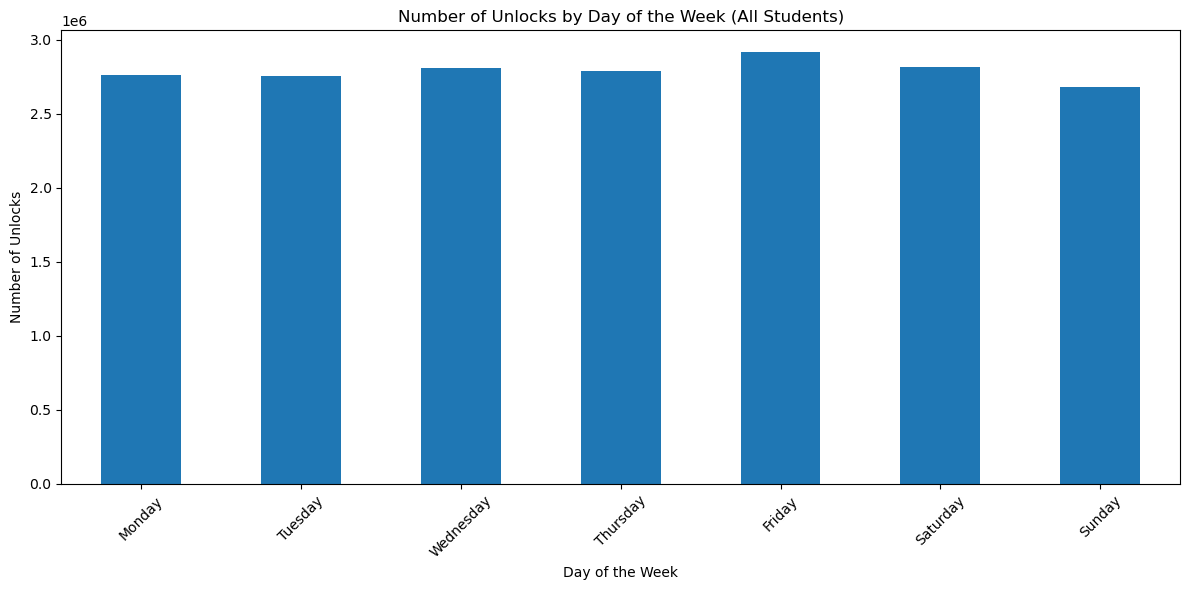

In [6]:
print("Unlocks by day of week:")
print(unlocks_by_day)

# Create a bar chart for unlocks by day of the week
plt.figure(figsize=(12, 6))
unlocks_by_day.plot(kind='bar')
plt.title('Number of Unlocks by Day of the Week (All Students)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
unlocks_by_day_gender = sensing.groupby(['day_of_week', 'gender'])['unlock_num_ep_0'].sum().unstack()
# unstack() so gender is column value (for readability)
unlocks_by_day_gender = unlocks_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_gender)

gender,F,M,both
day_of_week,,,
Monday,1862538,880067,13517
Tuesday,1857724,873000,12574
Wednesday,1891706,894300,13277
Thursday,1877533,887095,12920
Friday,1967299,928558,13235
Saturday,1905075,887335,11698
Sunday,1807823,855800,11777


<Figure size 3000x600 with 0 Axes>

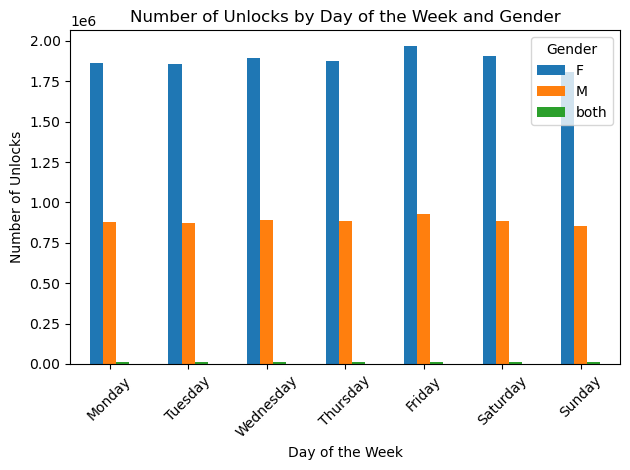

In [8]:

plt.figure(figsize=(30, 6))
unlocks_by_day_gender.plot(kind='bar')
plt.title('Number of Unlocks by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Compare unlocks by race
unlocks_by_day_race = sensing.groupby(['day_of_week', 'race'])['unlock_num_ep_0'].sum().unstack()
unlocks_by_day_race = unlocks_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_race)

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,8629,13277,13084,662489,88170,149639,87827,1733007
Tuesday,8131,13019,13465,660813,89802,151375,87870,1718823
Wednesday,8543,13093,13350,673480,90748,154566,88470,1757033
Thursday,8409,12979,13273,669545,90106,154106,87806,1741324
Friday,9425,14179,13105,705728,92820,158721,93244,1821870
Saturday,9288,12654,12109,664963,88510,159771,90182,1766631
Sunday,8574,11377,13243,634244,84063,150239,84845,1688815


<Figure size 1500x600 with 0 Axes>

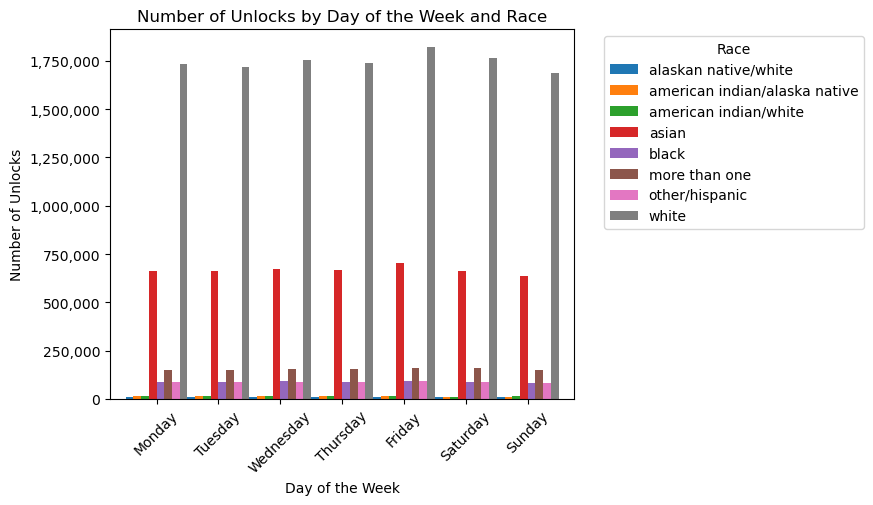

In [25]:
plt.figure(figsize=(15, 6))
unlocks_by_day_race.plot(kind='bar', width=1.0)
plt.title('Number of Unlocks by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.subplots_adjust(right=0.85)  # Adjust right margin to prevent legend cutoff
plt.show()

# Median unlocks by day of week and gender

In [16]:
unlocks_by_day_gender_median = sensing.groupby(['day_of_week', 'gender'])['unlock_num_ep_0'].median().unstack()
# unstack() so gender is column value (for readability)
unlocks_by_day_gender_median = unlocks_by_day_gender_median.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_gender_median)

gender,F,M,both
day_of_week,,,
Monday,78.0,83.0,64.0
Tuesday,78.0,83.0,63.0
Wednesday,79.0,84.0,63.0
Thursday,78.0,84.0,64.5
Friday,82.0,88.0,64.5
Saturday,78.0,83.0,56.0
Sunday,75.0,81.0,58.0


<Figure size 1200x600 with 0 Axes>

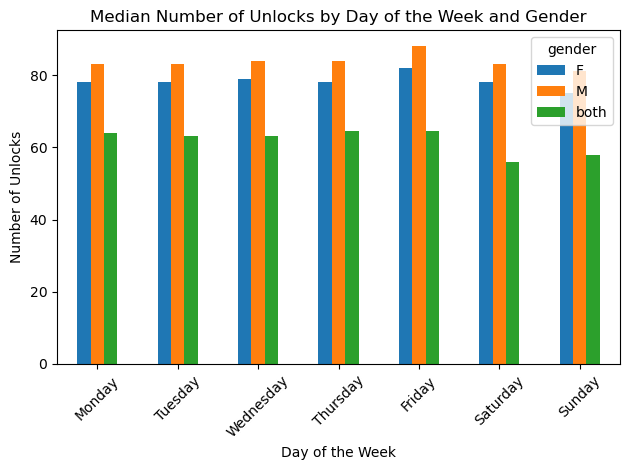

In [17]:
plt.figure(figsize=(12, 6))
unlocks_by_day_gender_median.plot(kind='bar')
plt.title('Median Number of Unlocks by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
unlocks_by_day_race_median = sensing.groupby(['day_of_week', 'race'])['unlock_num_ep_0'].median().unstack()
# unstack() so race is column value (for readability)
unlocks_by_day_race_median = unlocks_by_day_race_median.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_race_median)

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,49.5,74.0,77.5,78.0,70.0,85.0,74.0,80.0
Tuesday,49.0,65.5,81.0,78.0,71.0,87.0,73.0,80.0
Wednesday,51.0,67.0,83.0,79.0,72.0,88.0,74.0,81.0
Thursday,49.5,68.0,79.5,79.0,70.0,87.0,72.0,81.0
Friday,54.0,74.0,80.5,83.0,72.0,92.0,78.5,85.0
Saturday,54.0,66.0,76.0,77.0,69.0,89.0,73.0,81.0
Sunday,51.0,60.0,82.0,75.0,69.0,86.0,70.0,78.0


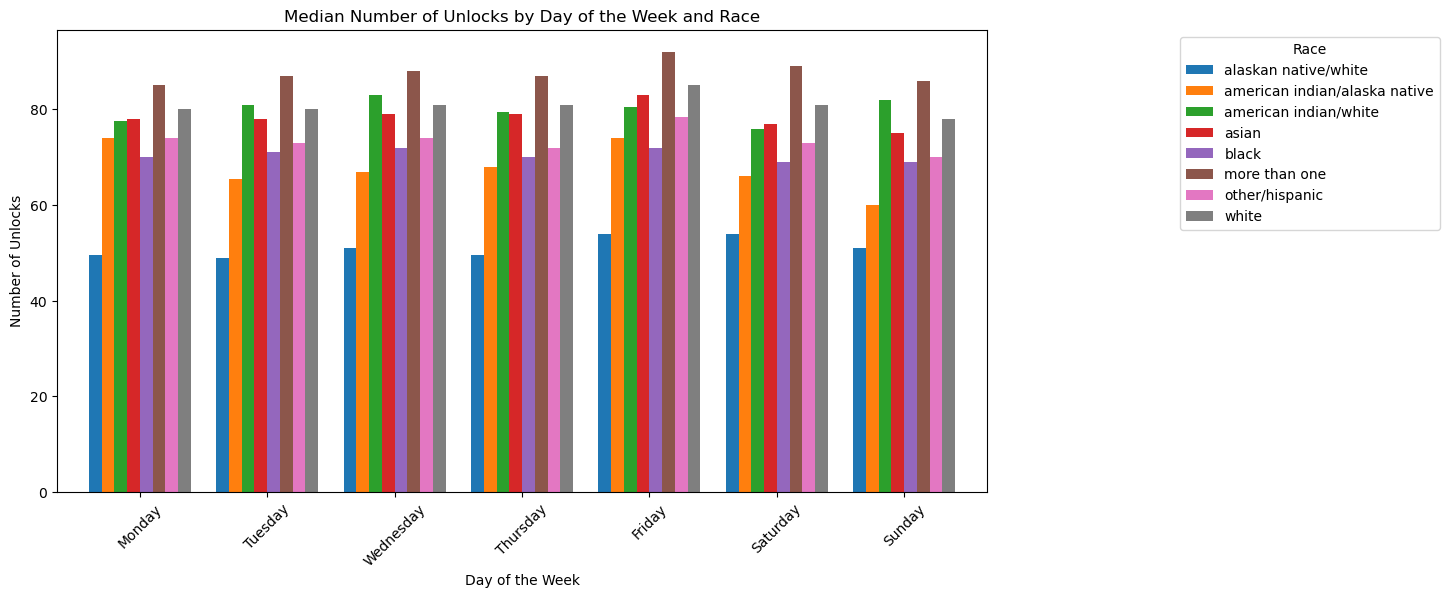

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create plot
unlocks_by_day_race_median.plot(kind='bar', width=0.8, ax=ax)
plt.title('Median Number of Unlocks by Day of the Week and Race')  # Fixed title to say Race instead of Gender
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')

# Format y-axis to remove scientific notation
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Move legend off the chart
plt.legend(title='Race', 
          bbox_to_anchor=(1.2, 1),
          loc='upper left')

plt.xticks(rotation=45)

# Keep plot size while accommodating legend
box = ax.get_position()
ax.set_position(box)

plt.show()

# Mean unlocks by day of week and gender

gender,F,M,both
day_of_week,,,
Monday,87.177065,96.615106,70.401042
Tuesday,86.805476,95.576965,66.178947
Wednesday,88.323186,97.556452,69.513089
Thursday,87.735187,97.120101,67.291667
Friday,92.422202,102.117893,68.932292
Saturday,89.272493,97.412998,60.611399
Sunday,84.620062,94.085312,61.020725


<Figure size 1200x600 with 0 Axes>

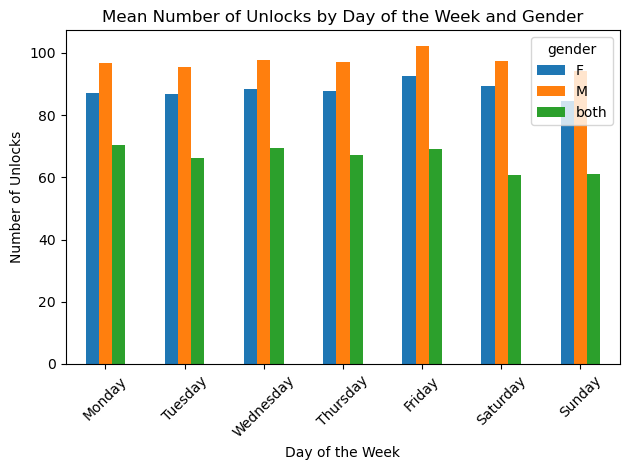

In [26]:
unlocks_by_day_gender_mean = sensing.groupby(['day_of_week', 'gender'])['unlock_num_ep_0'].mean().unstack()
unlocks_by_day_gender_mean = unlocks_by_day_gender_mean.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_gender_mean)

plt.figure(figsize=(12, 6))
unlocks_by_day_gender_mean.plot(kind='bar')
plt.title('Mean Number of Unlocks by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,52.615854,77.191860,79.780488,88.437992,76.803136,101.039163,80.427656,91.432257
Tuesday,49.579268,75.691860,82.103659,87.862385,77.683391,101.936027,80.173358,90.621764
Wednesday,52.091463,76.122093,81.402439,89.332803,78.231034,103.805238,80.208522,92.548486
Thursday,50.656627,75.023121,80.932927,89.070773,78.149176,103.426846,80.114964,91.808088
Friday,57.121212,81.959538,80.895062,94.285638,80.713043,106.954852,85.544954,96.589439
Saturday,56.634146,73.144509,75.211180,88.863156,76.433506,107.517497,81.909173,93.393476
Sunday,52.280488,66.145349,81.245399,84.656167,72.718858,101.307485,77.272313,89.237252


<Figure size 1200x600 with 0 Axes>

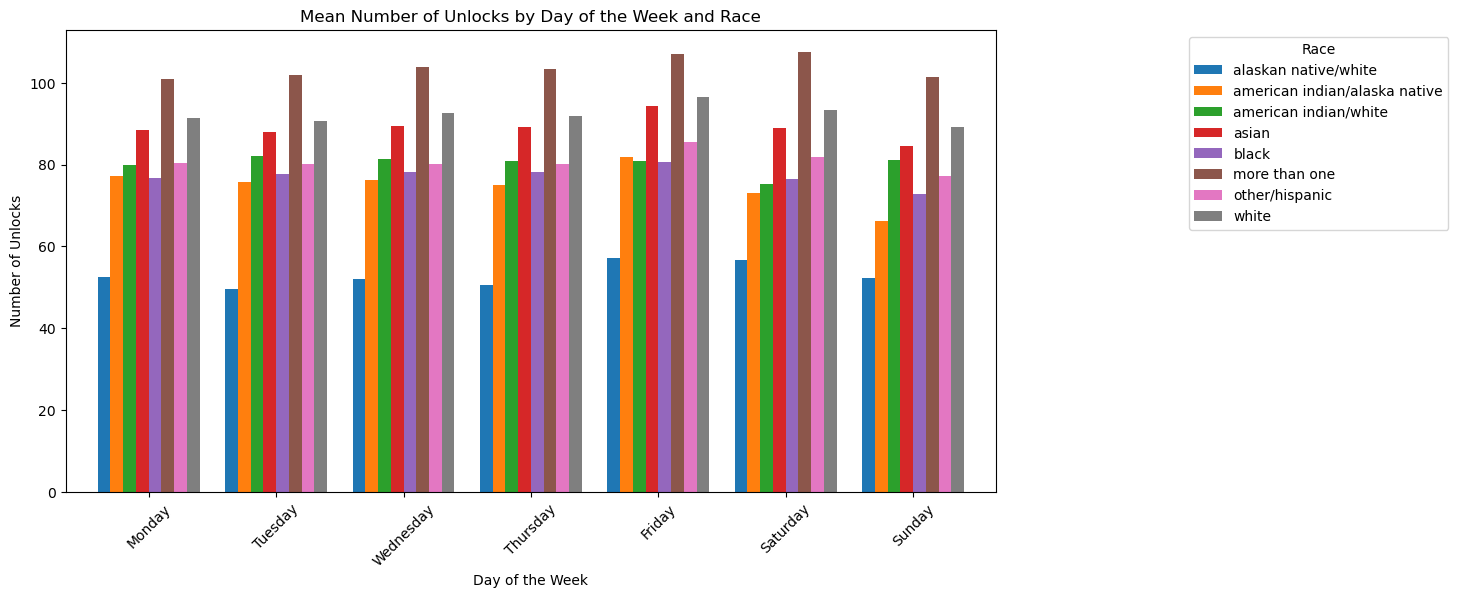

In [42]:
unlocks_by_day_race_mean = sensing.groupby(['day_of_week', 'race'])['unlock_num_ep_0'].mean().unstack()
unlocks_by_day_race_mean = unlocks_by_day_race_mean.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_race_mean)
plt.figure(figsize=(12, 6))

fig, ax = plt.subplots(figsize=(12, 6))
unlocks_by_day_race_mean.plot(kind='bar', width=0.8, ax=ax)
plt.title('Mean Number of Unlocks by Day of the Week and Race') 
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend(title='Race', 
          bbox_to_anchor=(1.2, 1),
          loc='upper left')
plt.xticks(rotation=45)
box = ax.get_position()
ax.set_position(box)

plt.show()


# Minimum unlocks by day of week and gender
Note: not exactly useful information

gender,F,M,both
day_of_week,,,
Monday,0,0,0
Tuesday,0,0,5
Wednesday,0,0,0
Thursday,0,0,4
Friday,0,0,0
Saturday,0,0,0
Sunday,0,0,0


<Figure size 1200x600 with 0 Axes>

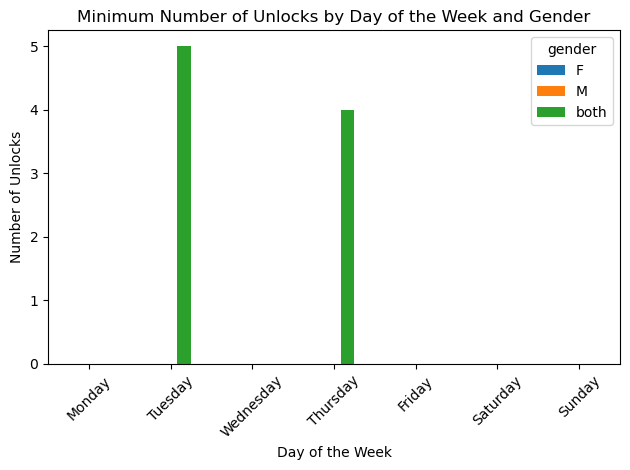

In [28]:
unlocks_by_day_gender_min = sensing.groupby(['day_of_week', 'gender'])['unlock_num_ep_0'].min().unstack()
unlocks_by_day_gender_min = unlocks_by_day_gender_min.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_gender_min)  
plt.figure(figsize=(12, 6))
unlocks_by_day_gender_min.plot(kind='bar')
plt.title('Minimum Number of Unlocks by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,0,0,0,0,0,0,0,0
Tuesday,0,20,0,0,0,0,0,0
Wednesday,0,17,0,0,0,0,0,0
Thursday,0,6,0,0,0,0,0,0
Friday,0,6,0,0,0,0,0,0
Saturday,0,6,0,0,0,0,0,0
Sunday,0,0,0,0,0,0,0,0


<Figure size 1200x600 with 0 Axes>

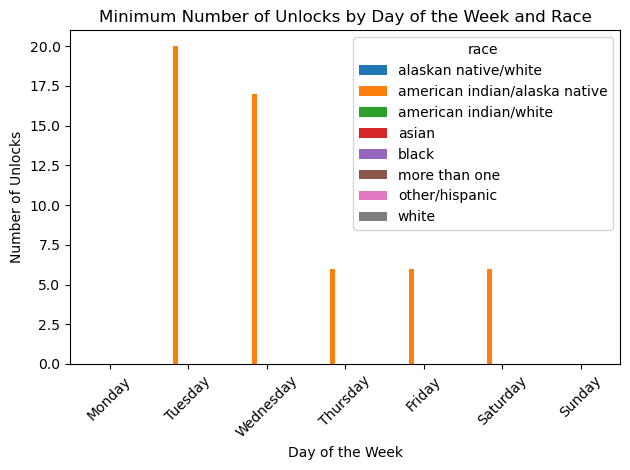

In [29]:
unlocks_by_day_race_min = sensing.groupby(['day_of_week', 'race'])['unlock_num_ep_0'].min().unstack()
unlocks_by_day_race_min = unlocks_by_day_race_min.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_race_min)
plt.figure(figsize=(12, 6))
unlocks_by_day_race_min.plot(kind='bar')
plt.title('Minimum Number of Unlocks by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Maximum unlocks by day of week and gender

gender,F,M,both
day_of_week,,,
Monday,692,502,190
Tuesday,702,533,150
Wednesday,660,519,180
Thursday,680,487,175
Friday,636,571,202
Saturday,754,549,187
Sunday,686,468,176


<Figure size 1200x600 with 0 Axes>

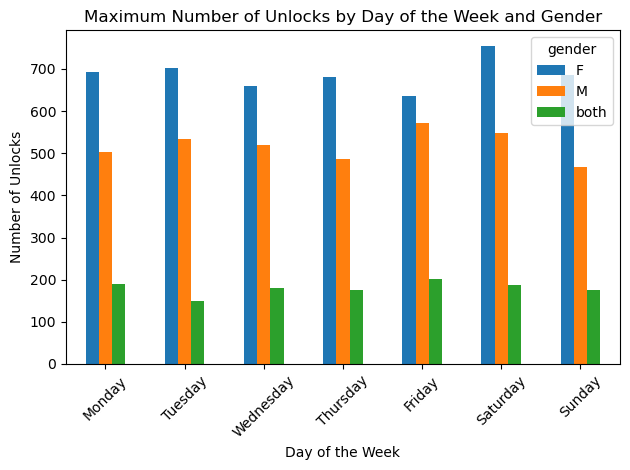

In [30]:
unlocks_by_day_gender_max = sensing.groupby(['day_of_week', 'gender'])['unlock_num_ep_0'].max().unstack()
unlocks_by_day_gender_max = unlocks_by_day_gender_max.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_gender_max)
plt.figure(figsize=(12, 6))
unlocks_by_day_gender_max.plot(kind='bar')
plt.title('Maximum Number of Unlocks by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,129,193,167,502,283,608,304,692
Tuesday,108,265,165,533,325,629,276,702
Wednesday,132,199,188,519,325,660,282,578
Thursday,138,200,164,480,504,680,285,580
Friday,121,299,209,571,289,587,351,636
Saturday,125,319,143,538,373,630,331,754
Sunday,131,202,167,468,307,651,320,686


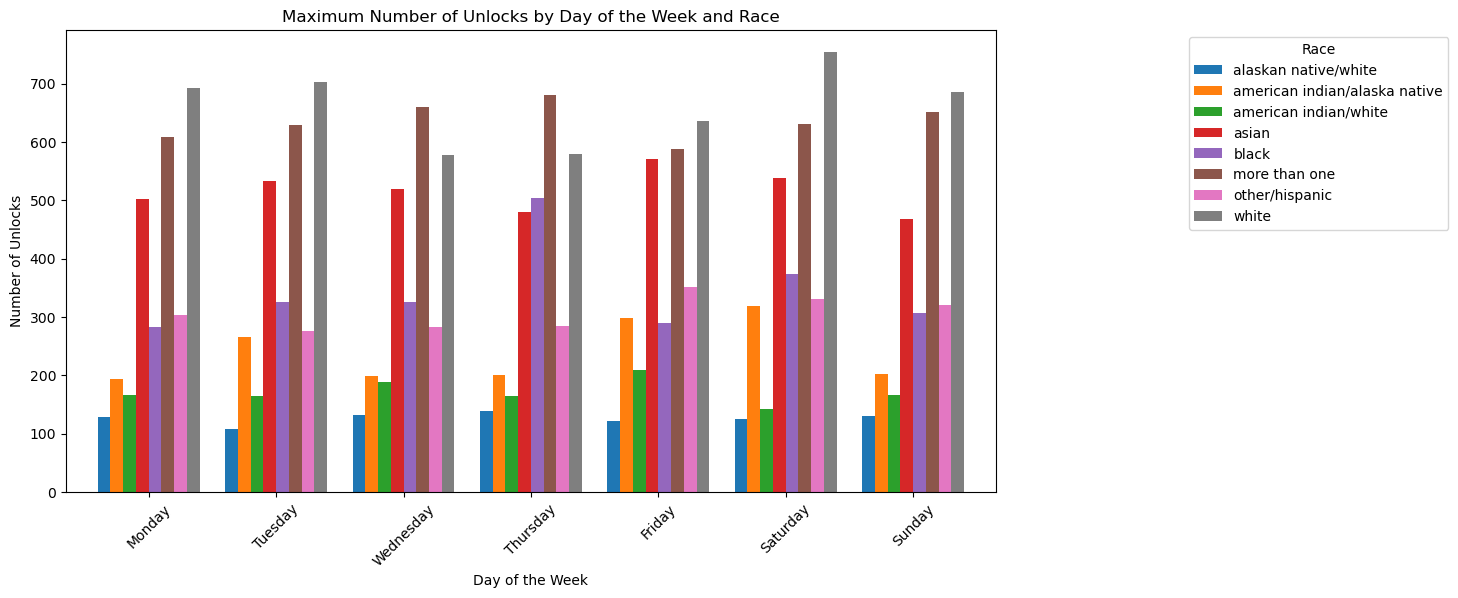

In [43]:

unlocks_by_day_race_max = sensing.groupby(['day_of_week', 'race'])['unlock_num_ep_0'].max().unstack()
unlocks_by_day_race_max = unlocks_by_day_race_max.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(unlocks_by_day_race_max)
fig, ax = plt.subplots(figsize=(12, 6))
unlocks_by_day_race_max.plot(kind='bar', width=0.8, ax=ax)
plt.title('Maximum Number of Unlocks by Day of the Week and Race')  # Fixed title to say Race instead of Gender
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unlocks')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(title='Race', 
          bbox_to_anchor=(1.2, 1),
          loc='upper left')
plt.xticks(rotation=45)
box = ax.get_position()
ax.set_position(box)

plt.show()